In [125]:
import numpy as np
import matplotlib.pyplot as plt
import eat
import pandas as pd
# from models.modelsFDH import FDH

In [126]:
import os
os.makedirs('./Benchmarking2', exist_ok=True)

In [127]:
DATAa = pd.read_csv('/Users/harshit/DEA/random_data.csv')

In [128]:
DATAa

,X1,X2,X3,Y1,Y2,Y3
0,8,-14,-43,9,-10,-22
1,49,-13,30,11,9,9
2,-18,-11,-16,5,-30,-23
3,35,-28,-40,-35,-16,6
4,34,-34,-22,-17,23,11
...,...,...,...,...,...,...
145,21,-31,42,35,0,0
146,20,-7,-5,-46,0,0
147,39,-8,-36,28,0,0
148,-29,18,21,46,0,0


In [129]:
dataA = DATAa.iloc[0:100]
dataB = DATAa.iloc[100:150].reset_index()

In [130]:
dataA.head()

,X1,X2,X3,Y1,Y2,Y3
0,8,-14,-43,9,-10,-22
1,49,-13,30,11,9,9
2,-18,-11,-16,5,-30,-23
3,35,-28,-40,-35,-16,6
4,34,-34,-22,-17,23,11


In [131]:
dataB = dataB.drop(['index'], axis=1)

In [132]:
dataB = dataB.drop(['Y2', 'Y3'], axis=1)

In [133]:
dataB.head()

,X1,X2,X3,Y1
0,14,34,33,-23
1,6,-49,43,2
2,36,-29,-49,40
3,-10,28,-10,12
4,-37,12,-19,-20


In [134]:
def stats(df, col):
    avg_eff = df[col].mean()
    min_eff = df[col].min()
    max_eff = df[col].max()
    std_dev_eff = df[col].std()
    # num_eff = (df[col]==1).sum()
    # num_considered = len(df)

    result = {
        'avg': avg_eff,
        'min': min_eff,
        'max': max_eff,
        'std_dev': std_dev_eff,
        # 'num_eff': num_eff,
        # 'num_considered': num_considered
    }
    return result
STATA = {}
STATB = {}

In [135]:
for c in dataA.columns:
    STATA[c] = stats(dataA, c)

In [136]:
STATA['X3']

{'avg': np.float64(-0.41),
 'min': np.int64(-50),
 'max': np.int64(50),
 'std_dev': np.float64(27.300828788248396)}

In [137]:
for c in dataB.columns:
    STATB[c] = stats(dataB, c)

In [138]:
STATA

{'X1': {'avg': np.float64(-0.24),
  'min': np.int64(-50),
  'max': np.int64(49),
  'std_dev': np.float64(28.984537849402297)},
 'X2': {'avg': np.float64(-0.8),
  'min': np.int64(-49),
  'max': np.int64(50),
  'std_dev': np.float64(28.794640354262338)},
 'X3': {'avg': np.float64(-0.41),
  'min': np.int64(-50),
  'max': np.int64(50),
  'std_dev': np.float64(27.300828788248396)},
 'Y1': {'avg': np.float64(-1.69),
  'min': np.int64(-35),
  'max': np.int64(31),
  'std_dev': np.float64(19.02188797733343)},
 'Y2': {'avg': np.float64(-1.95),
  'min': np.int64(-47),
  'max': np.int64(33),
  'std_dev': np.float64(20.89095062896416)},
 'Y3': {'avg': np.float64(1.72),
  'min': np.int64(-38),
  'max': np.int64(34),
  'std_dev': np.float64(20.824461141123958)}}

In [139]:
STATB

{'X1': {'avg': np.float64(4.36),
  'min': np.int64(-50),
  'max': np.int64(50),
  'std_dev': np.float64(29.223110787211425)},
 'X2': {'avg': np.float64(-3.64),
  'min': np.int64(-49),
  'max': np.int64(49),
  'std_dev': np.float64(30.090177392468195)},
 'X3': {'avg': np.float64(4.4),
  'min': np.int64(-49),
  'max': np.int64(50),
  'std_dev': np.float64(29.179248986712658)},
 'Y1': {'avg': np.float64(2.14),
  'min': np.int64(-48),
  'max': np.int64(50),
  'std_dev': np.float64(33.22220182163655)}}

In [140]:
# plt.hist(dataA[['X3']], bins=30)

In [141]:
dfa = pd.DataFrame(dataA, columns=['X1', 'X2', 'X3', 'Y1', 'Y2', 'Y3'])
dfb = pd.DataFrame(dataB, columns=['X1', 'X2', 'X3', 'Y1'])

In [142]:
nodes1= {
    0: [10,18,46,50], 
    1: [2,31,34,40,45,57,59,62,71,79,92,93], 
    2: [8,17,19,21,41,58,97], 
    3: [28,43,94], 
    4: [44,51,53,55,61,73,74,77,89], 
    5: [6,7,16,22,23,27,33,47,54,64,65,72,84,95], 
    6: [4,25,49,52,67], 
    7: [0,3,5,11,14,15,20,26,29], 
    8: [60,63,82,96], 
    9: [30,36,42,66,70,98], 
    10: [9,12,38,39,56,69,76,78,80,83,99], 
    11: [13,24,32,35,68,85,86,87,88,90], 
    12: [1,37,48,75,81,91]
}

a1= np.array([[-50 , -49,  -50],
 [-45 , -49,  -50],
[ -11 , -49,  -50],
  [-45  , -9 , -50],
 [ -40  , -9 , -50],
 [ -40 ,  -9   , 6],
 [ 3 , -49 , -50],
  [ 3 , -30 , -50],
   [ 47 , -10,  -50],
[ 3  ,-10 , -50],
[  19 , -10,  -50],
 [ 3 , -49  , 16],
 [25 , -49,   16],
])

d_T1= np.array([[ 17  ,  3 ,  33],
  [ 20  , 21 ,  33],
  [25 ,  28 ,  33],
[31 ,  21,   33],
 [ 31 ,  28,   33],
 [31  , 30   ,33],
  [ 25 ,  31 ,  33],
 [30  , 31 ,  33],
 [ 31 ,  31 ,  33],
[31 ,  31  , 33],
[31 ,  31 ,  33],
  [ 31 ,  32 ,  33],
[31 ,  32,   34]
])






nodes2={0,1,2,3,4,5,6,7,8,9,10}

a2 = np.array([[47  ,-49 , -49],
 [-50 , -49 , -49],
[ -50  ,-45 , -49],
[ -22 , -45,  -49],
  [-22 , -45,   29],
  [-50 , -33 , -49],
  [-42 , -33 , -49],
 [ -42 , -33,   20],
  [-29 , -16,  -49],
 [-29 , -33,  -49],
  [ 35 , -33 , -49]
])
d_T2=np.array([[50],
 [2],
 [10],
 [40],
 [41],
 [12],
 [41],
 [43],
 [47],
[43],
[45]
])

In [143]:
dfa

,X1,X2,X3,Y1,Y2,Y3
0,8,-14,-43,9,-10,-22
1,49,-13,30,11,9,9
2,-18,-11,-16,5,-30,-23
3,35,-28,-40,-35,-16,6
4,34,-34,-22,-17,23,11
...,...,...,...,...,...,...
95,-40,-9,6,31,30,33
96,47,16,2,25,-16,16
97,-18,-45,21,-11,10,11
98,8,11,10,22,10,-38


In [144]:
dfa.head()

,X1,X2,X3,Y1,Y2,Y3
0,8,-14,-43,9,-10,-22
1,49,-13,30,11,9,9
2,-18,-11,-16,5,-30,-23
3,35,-28,-40,-35,-16,6
4,34,-34,-22,-17,23,11


In [145]:
dfb.head()

,X1,X2,X3,Y1
0,14,34,33,-23
1,6,-49,43,2
2,36,-29,-49,40
3,-10,28,-10,12
4,-37,12,-19,-20


In [146]:
# Yb

In [147]:
dfa.shape, dfb.shape

((100, 6), (50, 4))

In [148]:
dfa_selected = dfa[['X1', 'X2', 'X3']]
dfb_selected = dfb[['X1', 'X2', 'X3']]
x = np.concatenate([dfa_selected.values, dfb_selected.values], axis=0)

In [149]:
dfa_selected.shape, dfb_selected.shape

((100, 3), (50, 3))

In [150]:
x.shape

(150, 3)

In [151]:
dfb.shape

(50, 4)

In [152]:
dfa_selected = dfa[['Y1', 'Y2', 'Y3']]
dfb_selected = np.concatenate([dfb[['Y1']].values, np.zeros((50, 2))], axis=1)
y = np.concatenate([dfa_selected, dfb_selected], axis=0)

In [153]:
y.shape

(150, 3)

In [154]:
y

array([[  9., -10., -22.],
       [ 11.,   9.,   9.],
       [  5., -30., -23.],
       [-35., -16.,   6.],
       [-17.,  23.,  11.],
       [ 27.,  19., -19.],
       [-32.,  27.,  16.],
       [  7., -25., -17.],
       [-13., -30.,  32.],
       [ -1.,  20., -24.],
       [-14., -25.,  32.],
       [ -8.,  14.,  30.],
       [-23.,   5., -15.],
       [-13.,   4.,  10.],
       [ -7.,  29.,  -6.],
       [ 30., -18.,  -8.],
       [ 17., -22.,  11.],
       [-28.,  -3.,  22.],
       [-22.,   3.,  33.],
       [-17.,  26.,  -6.],
       [ -2.,  31.,  24.],
       [  5.,  -5., -26.],
       [ 10., -23., -19.],
       [  8.,  30.,   4.],
       [ 22.,  29.,  15.],
       [ 10.,  31., -32.],
       [  4.,  12., -32.],
       [-27., -26.,  17.],
       [ 31., -35.,  12.],
       [ -1., -26.,  26.],
       [-11., -11., -33.],
       [-12., -22., -34.],
       [  6.,  15., -11.],
       [-18.,   5., -27.],
       [ 14., -19.,   7.],
       [-20.,  29.,  16.],
       [-35., -12., -14.],
 

In [155]:
# x, y = np.concatenate([dfa[]])

In [156]:
RESULTS = {}

In [157]:
dfeff = pd.read_csv('random efficiencies all.csv')

In [158]:
dfeff

,EATFDH,EAT,RDMFDH,RDM
0,"0.20731707317067938},","0.08640439077882589},","0.28861788617859685},","0.2130480206260612},"
1,"0.1934974747474748},","0.08892243334140604},","0.38641220390678577},","0.199387464316932},"
2,"0.15974499254288443},","0.07996361559362186},","0.3618421052631582},","0.21295504534716403},"
3,"0.14755944931163956},","0.05558617740961136},","0.35620915032679745},","0.15844859116895038},"
4,"0.2397388059701493},","0.08261266799188394},","0.3836805555555556},","0.24002470905428086},"
...,...,...,...,...
145,": 0.6666666666666667},",": 0.45428807085617584},",": 0.6666666666666667},",": 0.5692233843666312},"
146,": 0.33743081662488894},",": 0.1894112936845017},",": 0.4},",": 0.34729871671918544},"
147,": 0.3902439024390244},",": 0.31071065041721635},",": 0.9285714285714286},",": 0.5631281407035177},"
148,": 1.0},",": 0.904411764705882},",": 1.0},",": 1.0},"


In [159]:
dfeff.rename(columns={'EATFDH':'E_CRE',
                      'EAT':'E_NCRE',
                      'RDMFDH':'E_NCR',
                      'RDM':'E_CR'}, inplace=True)


In [160]:
dfeff

,E_CRE,E_NCRE,E_NCR,E_CR
0,"0.20731707317067938},","0.08640439077882589},","0.28861788617859685},","0.2130480206260612},"
1,"0.1934974747474748},","0.08892243334140604},","0.38641220390678577},","0.199387464316932},"
2,"0.15974499254288443},","0.07996361559362186},","0.3618421052631582},","0.21295504534716403},"
3,"0.14755944931163956},","0.05558617740961136},","0.35620915032679745},","0.15844859116895038},"
4,"0.2397388059701493},","0.08261266799188394},","0.3836805555555556},","0.24002470905428086},"
...,...,...,...,...
145,": 0.6666666666666667},",": 0.45428807085617584},",": 0.6666666666666667},",": 0.5692233843666312},"
146,": 0.33743081662488894},",": 0.1894112936845017},",": 0.4},",": 0.34729871671918544},"
147,": 0.3902439024390244},",": 0.31071065041721635},",": 0.9285714285714286},",": 0.5631281407035177},"
148,": 1.0},",": 0.904411764705882},",": 1.0},",": 1.0},"


In [161]:
def clean_entry(entry):
    entry = entry.replace('}', '').strip()
    entry = entry.replace(',', '')
    entry = entry.replace(':', '')
    entry = entry.replace(']','')
    return entry

dfeff = dfeff.applymap(clean_entry)

/var/folders/7w/3vj71g3x61v5rw8zzntby1m00000gn/T/ipykernel_5855/3603596720.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfeff = dfeff.applymap(clean_entry)


In [162]:
dfeff

,E_CRE,E_NCRE,E_NCR,E_CR
0,0.20731707317067938,0.08640439077882589,0.28861788617859685,0.2130480206260612
1,0.1934974747474748,0.08892243334140604,0.38641220390678577,0.199387464316932
2,0.15974499254288443,0.07996361559362186,0.3618421052631582,0.21295504534716403
3,0.14755944931163956,0.05558617740961136,0.35620915032679745,0.15844859116895038
4,0.2397388059701493,0.08261266799188394,0.3836805555555556,0.24002470905428086
...,...,...,...,...
145,0.6666666666666667,0.45428807085617584,0.6666666666666667,0.5692233843666312
146,0.33743081662488894,0.1894112936845017,0.4,0.34729871671918544
147,0.3902439024390244,0.31071065041721635,0.9285714285714286,0.5631281407035177
148,1.0,0.904411764705882,1.0,1.0


In [163]:
dfeff.to_excel('rough.xlsx')

In [164]:
for c in dfeff.columns:
    print(c)

E_CRE
E_NCRE
E_NCR
E_CR


In [165]:
dfa

,X1,X2,X3,Y1,Y2,Y3
0,8,-14,-43,9,-10,-22
1,49,-13,30,11,9,9
2,-18,-11,-16,5,-30,-23
3,35,-28,-40,-35,-16,6
4,34,-34,-22,-17,23,11
...,...,...,...,...,...,...
95,-40,-9,6,31,30,33
96,47,16,2,25,-16,16
97,-18,-45,21,-11,10,11
98,8,11,10,22,10,-38


In [166]:
dfeff

,E_CRE,E_NCRE,E_NCR,E_CR
0,0.20731707317067938,0.08640439077882589,0.28861788617859685,0.2130480206260612
1,0.1934974747474748,0.08892243334140604,0.38641220390678577,0.199387464316932
2,0.15974499254288443,0.07996361559362186,0.3618421052631582,0.21295504534716403
3,0.14755944931163956,0.05558617740961136,0.35620915032679745,0.15844859116895038
4,0.2397388059701493,0.08261266799188394,0.3836805555555556,0.24002470905428086
...,...,...,...,...
145,0.6666666666666667,0.45428807085617584,0.6666666666666667,0.5692233843666312
146,0.33743081662488894,0.1894112936845017,0.4,0.34729871671918544
147,0.3902439024390244,0.31071065041721635,0.9285714285714286,0.5631281407035177
148,1.0,0.904411764705882,1.0,1.0


In [167]:
# dfres4 = pd.DataFrame(res4)
# dfres3 = pd.DataFrame(res3)
# dfres2 = pd.DataFrame(res2)
# dfres1 = pd.DataFrame(res1)

In [168]:
# df_combined = pd.concat([dfres1.set_index('DMU'), dfres2.set_index('DMU'), 
#                          dfres3.set_index('DMU'), dfres4.set_index('DMU')], axis=1)

In [169]:
# df_combined

In [170]:
# df_combined['DMU'] = range(1, len(df_combined) + 1)

In [171]:
# df_combined.reset_index(drop=True, inplace=True)


In [172]:
# df_combined

In [173]:
# df_combined.to_excel('./Benchmarking2/efficiencies.xlsx', index=True)

In [174]:
def stats(df, col):
    avg_eff = df[col].mean()
    min_eff = df[col].min()
    max_eff = df[col].max()
    std_dev_eff = df[col].std()
    num_eff = (df[col]==1).sum()
    num_considered = len(df)

    result = {
        'avg': avg_eff,
        'min': min_eff,
        'max': max_eff,
        'std_dev': std_dev_eff,
        'num_eff': num_eff,
        'num_considered': num_considered
    }
    return result


In [175]:
dfeff

,E_CRE,E_NCRE,E_NCR,E_CR
0,0.20731707317067938,0.08640439077882589,0.28861788617859685,0.2130480206260612
1,0.1934974747474748,0.08892243334140604,0.38641220390678577,0.199387464316932
2,0.15974499254288443,0.07996361559362186,0.3618421052631582,0.21295504534716403
3,0.14755944931163956,0.05558617740961136,0.35620915032679745,0.15844859116895038
4,0.2397388059701493,0.08261266799188394,0.3836805555555556,0.24002470905428086
...,...,...,...,...
145,0.6666666666666667,0.45428807085617584,0.6666666666666667,0.5692233843666312
146,0.33743081662488894,0.1894112936845017,0.4,0.34729871671918544
147,0.3902439024390244,0.31071065041721635,0.9285714285714286,0.5631281407035177
148,1.0,0.904411764705882,1.0,1.0


In [176]:
for c in dfeff.columns:
    dfeff[c] = dfeff[c].astype(float)

In [177]:
dfeff

,E_CRE,E_NCRE,E_NCR,E_CR
0,0.207317,0.086404,0.288618,0.213048
1,0.193497,0.088922,0.386412,0.199387
2,0.159745,0.079964,0.361842,0.212955
3,0.147559,0.055586,0.356209,0.158449
4,0.239739,0.082613,0.383681,0.240025
...,...,...,...,...
145,0.666667,0.454288,0.666667,0.569223
146,0.337431,0.189411,0.400000,0.347299
147,0.390244,0.310711,0.928571,0.563128
148,1.000000,0.904412,1.000000,1.000000


In [178]:
STATS = {}
for c in dfeff.columns:
    STATS[c] = stats(dfeff, c)

In [179]:
STATS

{'E_CRE': {'avg': np.float64(0.3609168022351549),
  'min': np.float64(0.12779958439154115),
  'max': np.float64(1.0),
  'std_dev': np.float64(0.2415456634431237),
  'num_eff': np.int64(13),
  'num_considered': 150},
 'E_NCRE': {'avg': np.float64(0.21914472125999518),
  'min': np.float64(0.05111730503608658),
  'max': np.float64(1.0),
  'std_dev': np.float64(0.2306893200220777),
  'num_eff': np.int64(3),
  'num_considered': 150},
 'E_NCR': {'avg': np.float64(0.5870739006329844),
  'min': np.float64(0.23028455284526073),
  'max': np.float64(1.0),
  'std_dev': np.float64(0.2341212825990375),
  'num_eff': np.int64(21),
  'num_considered': 150},
 'E_CR': {'avg': np.float64(0.3895645222147662),
  'min': np.float64(0.14534037909532205),
  'max': np.float64(1.0),
  'std_dev': np.float64(0.24268370524484287),
  'num_eff': np.int64(14),
  'num_considered': 150}}

In [181]:
# dfstats1 = pd.DataFrame(list(stats(dfeff, 'RDM').items()), columns=['Index', 'RDM'])
# dfstats2 = pd.DataFrame(list(stats(dfeff, 'RDMFDH').items()), columns=['Index', 'RDM_FDH'])
# dfstats3 = pd.DataFrame(list(stats(dfeff, 'EAT').items()), columns=['Index', 'EAT'])
# dfstats4 = pd.DataFrame(list(stats(dfeff, 'EATFDH').items()), columns=['Index', 'EAT_FDH'])
# dfstats1, dfstats2, dfstats3, dfstats4

In [182]:
# df_merged = dfstats1.merge(dfstats2, on='Index', how='outer') \
#                     .merge(dfstats3, on='Index', how='outer') \
#                     .merge(dfstats4, on='Index', how='outer')

# # Display the resulting DataFrame
# df_merged

In [183]:
# df_merged.to_excel('./Benchmarking2/stats.xlsx', index=False)

In [184]:
# dfstats3

In [185]:
dfeff

,E_CRE,E_NCRE,E_NCR,E_CR
0,0.207317,0.086404,0.288618,0.213048
1,0.193497,0.088922,0.386412,0.199387
2,0.159745,0.079964,0.361842,0.212955
3,0.147559,0.055586,0.356209,0.158449
4,0.239739,0.082613,0.383681,0.240025
...,...,...,...,...
145,0.666667,0.454288,0.666667,0.569223
146,0.337431,0.189411,0.400000,0.347299
147,0.390244,0.310711,0.928571,0.563128
148,1.000000,0.904412,1.000000,1.000000


In [186]:
dfeff2 = dfeff

In [187]:
dfeff2['dmu'] = range(1, 151)

In [188]:
dfeff2

,E_CRE,E_NCRE,E_NCR,E_CR,dmu
0,0.207317,0.086404,0.288618,0.213048,1
1,0.193497,0.088922,0.386412,0.199387,2
2,0.159745,0.079964,0.361842,0.212955,3
3,0.147559,0.055586,0.356209,0.158449,4
4,0.239739,0.082613,0.383681,0.240025,5
...,...,...,...,...,...
145,0.666667,0.454288,0.666667,0.569223,146
146,0.337431,0.189411,0.400000,0.347299,147
147,0.390244,0.310711,0.928571,0.563128,148
148,1.000000,0.904412,1.000000,1.000000,149


In [189]:
dfeff = dfeff2

In [190]:
# import pandas as pd
# import matplotlib.pyplot as plt
# df = dfeff
# # dfeff[['dmu']] = range(1, 151)
# # df.set_index('dmu', inplace=True)

# plt.figure(figsize=(10, 6))

# plt.plot(df.index, df['RDM'], label='RDM', marker='o')
# plt.plot(df.index, df['RDMFDH'], label='RDM_FDH', marker='x')
# plt.plot(df.index, df['EAT'], label='EAT', marker='s')
# plt.plot(df.index, df['EATFDH'], label='EAT_FDH', marker='D')

# plt.xlabel('DMU')
# plt.ylabel('Efficiency Value')
# # plt.title('Efficiency Values of 32 DMUs')
# plt.legend()

# plt.grid(True)
# # plt.savefig('./plot.pdf', dpi=300)

# plt.show()


In [191]:
# df_combined

In [192]:
x.shape

(150, 3)

In [193]:
y

array([[  9., -10., -22.],
       [ 11.,   9.,   9.],
       [  5., -30., -23.],
       [-35., -16.,   6.],
       [-17.,  23.,  11.],
       [ 27.,  19., -19.],
       [-32.,  27.,  16.],
       [  7., -25., -17.],
       [-13., -30.,  32.],
       [ -1.,  20., -24.],
       [-14., -25.,  32.],
       [ -8.,  14.,  30.],
       [-23.,   5., -15.],
       [-13.,   4.,  10.],
       [ -7.,  29.,  -6.],
       [ 30., -18.,  -8.],
       [ 17., -22.,  11.],
       [-28.,  -3.,  22.],
       [-22.,   3.,  33.],
       [-17.,  26.,  -6.],
       [ -2.,  31.,  24.],
       [  5.,  -5., -26.],
       [ 10., -23., -19.],
       [  8.,  30.,   4.],
       [ 22.,  29.,  15.],
       [ 10.,  31., -32.],
       [  4.,  12., -32.],
       [-27., -26.,  17.],
       [ 31., -35.,  12.],
       [ -1., -26.,  26.],
       [-11., -11., -33.],
       [-12., -22., -34.],
       [  6.,  15., -11.],
       [-18.,   5., -27.],
       [ 14., -19.,   7.],
       [-20.,  29.,  16.],
       [-35., -12., -14.],
 

In [194]:
# dfeff.drop('dmu', axis=0)

In [195]:
# dfeff.drop('dmu', axis=0)

In [196]:
CrM = dfeff.iloc[:, 0:4].corr()

In [197]:
CrM

,E_CRE,E_NCRE,E_NCR,E_CR
E_CRE,1.000000,0.920980,0.765516,0.922425
E_NCRE,0.920980,1.000000,0.708662,0.923386
E_NCR,0.765516,0.708662,1.000000,0.857315
E_CR,0.922425,0.923386,0.857315,1.000000


In [198]:
CrM

,E_CRE,E_NCRE,E_NCR,E_CR
E_CRE,1.000000,0.920980,0.765516,0.922425
E_NCRE,0.920980,1.000000,0.708662,0.923386
E_NCR,0.765516,0.708662,1.000000,0.857315
E_CR,0.922425,0.923386,0.857315,1.000000


In [199]:
CrM.to_csv('CRM.csv')

In [200]:
dpi = 300

plt.figure(figsize=(8, 6), dpi=dpi)
plt.scatter(dfeff["RDM"], dfeff["RDMFDH"])
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
plt.plot([0, 1], [1, 1], color='grey', linestyle='--')  # horizontal line at y=1
plt.plot([1, 1], [0, 1], color='grey', linestyle='--')  # vertical line at x=1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('RDM')
plt.ylabel('RDM_FDH')
plt.title('ScatterPlot between RDM and RDM_FDH Efficiency Values')

plt.savefig('RDMvRDM_FDH.png')
plt.show()

KeyError: 'RDM'

<Figure size 2400x1800 with 0 Axes>

In [75]:
# plt.figure(figsize=(8, 6), dpi=dpi)
# plt.scatter(res["efficiency_EAT"], res["efficiency_EAT_FDH"])
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
# plt.plot([0, 1], [1, 1], color='grey', linestyle='--')  # horizontal line at y=1
# plt.plot([1, 1], [0, 1], color='grey', linestyle='--')  # vertical line at x=1
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlabel('EAT')
# plt.ylabel('EAT_FDH')
# plt.title('ScatterPlot between EAT and EAT_FDH Efficiency Values')

# # Save the plot with XvY.png name
# plt.savefig('EATvEAT_FDH.png')
# plt.show()

In [76]:
dfeff['CEAT'] = dfeff['EATFDH']

In [77]:
df

,EATFDH,EAT,RDMFDH,RDM,dmu,CEAT
0,0.207317,0.086404,0.288618,0.213048,1,0.207317
1,0.193497,0.088922,0.386412,0.199387,2,0.193497
2,0.159745,0.079964,0.361842,0.212955,3,0.159745
3,0.147559,0.055586,0.356209,0.158449,4,0.147559
4,0.239739,0.082613,0.383681,0.240025,5,0.239739
...,...,...,...,...,...,...
145,0.666667,0.454288,0.666667,0.569223,146,0.666667
146,0.337431,0.189411,0.400000,0.347299,147,0.337431
147,0.390244,0.310711,0.928571,0.563128,148,0.390244
148,1.000000,0.904412,1.000000,1.000000,149,1.000000


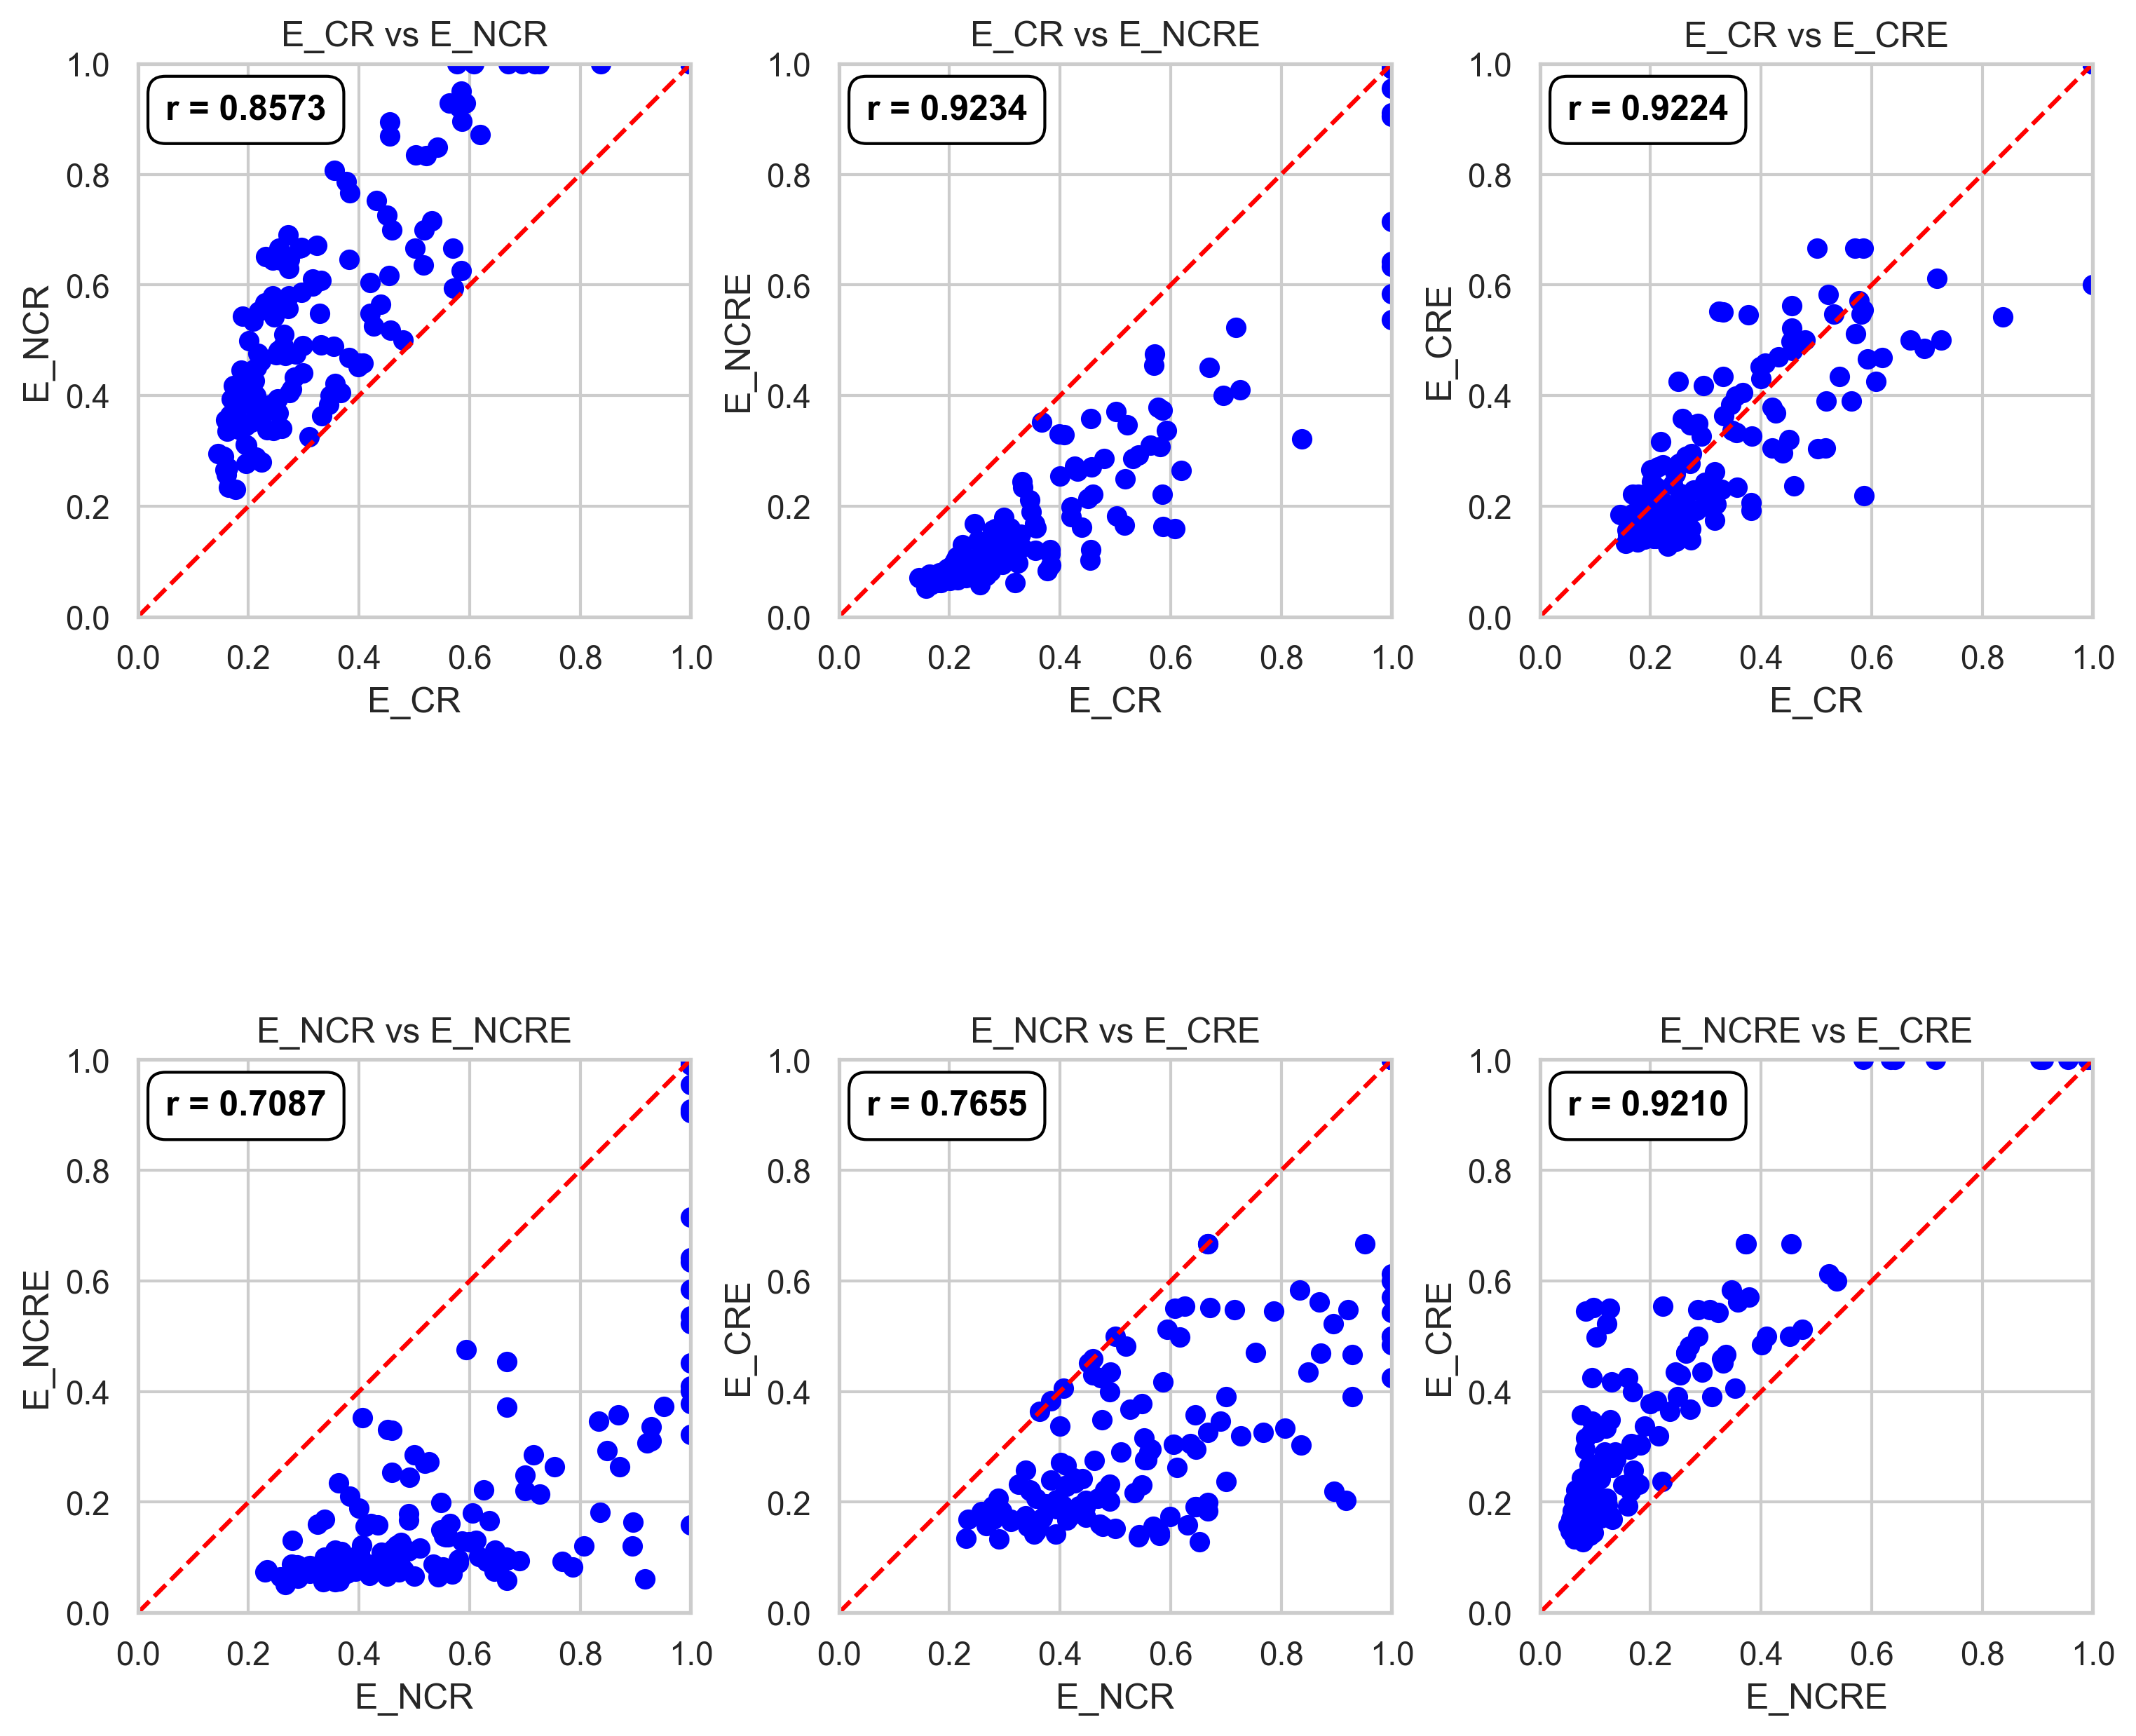

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Define the confusion matrix data
# df = pd.DataFrame(data, index=['RDM', 'RDMFDH', 'EAT', 'EATFDH'])

pairs = [('E_CR', 'E_NCR'), ('E_CR', 'E_NCRE'), ('E_CR', 'E_CRE'),
         ('E_NCR', 'E_NCRE'), ('E_NCR', 'E_CRE'),
         ('E_NCRE', 'E_CRE')]

# Set up the plotting environment with a higher resolution and larger figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10), dpi=300)  # Increased figure size and resolution

# Iterate over each pair and create a scatter plot
for i, (var1, var2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    
    x = dfeff[f'{var1}']
    y = dfeff[f'{var2}']
    
    plt.scatter(x, y, label=f'{var1} vs {var2}', color='blue')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    
    # Calculate and display correlation coefficient
    r = np.corrcoef(x, y)[0, 1]
    plt.text(0.05, 0.9, f'r = {r:.4f}', transform=plt.gca().transAxes,
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'{var1} vs {var2}')
    # plt.legend()
    
    # Make axes square
    plt.gca().set_aspect('equal', adjustable='box')

# Adjust the layout for tighter packing between subplots
plt.tight_layout(pad=0.0)  # Increase pad for tighter packing

plt.show()


In [79]:
# plt.figure(figsize=(8, 6), dpi=dpi)
# plt.scatter(res["efficiency_EAT"], res["efficiency_RDM"])
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
# plt.plot([0, 1], [1, 1], color='grey', linestyle='--')  # horizontal line at y=1
# plt.plot([1, 1], [0, 1], color='grey', linestyle='--')  # vertical line at x=1
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlabel('EAT')
# plt.ylabel('RDM')
# plt.title('ScatterPlot between EAT and RDM Efficiency Values')

# # Save the plot with XvY.png name
# plt.savefig('EATvRDM.png')
# plt.show()

In [80]:
# RDM EATFDH
# RDMFDH EAT
# RDM
# EAT EATFDH

In [81]:
# plt.figure(figsize=(8, 6), dpi=dpi)
# plt.scatter(res["efficiency_EAT"], res["efficiency_RDM"])
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
# plt.plot([0, 1], [1, 1], color='grey', linestyle='--')  # horizontal line at y=1
# plt.plot([1, 1], [0, 1], color='grey', linestyle='--')  # vertical line at x=1
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.xlabel('EAT')
# plt.ylabel('RDM')
# plt.title('ScatterPlot between EAT and RDM Efficiency Values')

# # Save the plot with XvY.png name
# plt.savefig('EATvRDM.png')
# plt.show()

In [82]:
# from scipy.stats import f
# F1 = res['efficiency_EAT'].values
# F2 = res['efficiency_RDM'].values
# n1 = len(F1)
# n2 = len(F2)
# TEX = np.mean(F1 - 1) / np.mean(F2 - 1)
# alpha = 0.05
# crit_low = f.ppf(alpha/2, 2*n1, 2*n2)
# crit_high = f.ppf(1-(alpha/2), 2*n1, 2*n2)

# if TEX < crit_low or TEX > crit_high:
#     print("Significant difference between models")
# else:
#     print("No significant difference between models")

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

models = ['RDM', 'RDMFDH', 'EAT', 'CEAT']
results = []

for i in range(len(models)):
    for j in range(i + 1, len(models)):
        M1 = models[i]
        M2 = models[j]
        data1 = dfeff[M1].dropna().values
        data2 = dfeff[M2].dropna().values
        
        ks_stat, p_value = ks_2samp(data1, data2)
        results.append([M1, M2, ks_stat, p_value])

results_df = pd.DataFrame(results, columns=['Model1', 'Model2', 'TKS', 'p-value'])
print(results_df)


   Model1  Model2       TKS       p-value
0     RDM  RDMFDH  0.500000  2.089560e-17
1     RDM     EAT  0.586667  2.925236e-24
2     RDM    CEAT  0.166667  3.083896e-02
3  RDMFDH     EAT  0.733333  2.089059e-39
4  RDMFDH    CEAT  0.520000  7.237717e-19
5     EAT    CEAT  0.553333  1.847691e-21


In [84]:
ks_stat, p_value = ks_2samp(dfeff['EAT'].dropna().values, dfeff['EAT'].dropna().values)
print(ks_stat, p_value)

0.0 1.0


(array([17., 32., 17., 14.,  7.,  8.,  6.,  2.,  4.,  1.,  3.,  4.,  3.,
         2.,  3.,  3.,  3.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,  0.,  5.]),
 array([0.05111731, 0.07009496, 0.08907261, 0.10805027, 0.12702792,
        0.14600557, 0.16498323, 0.18396088, 0.20293854, 0.22191619,
        0.24089384, 0.2598715 , 0.27884915, 0.29782681, 0.31680446,
        0.33578211, 0.35475977, 0.37373742, 0.39271508, 0.41169273,
        0.43067038, 0.44964804, 0.46862569, 0.48760334, 0.506581  ,
        0.52555865, 0.54453631, 0.56351396, 0.58249161, 0.60146927,
        0.62044692, 0.63942458, 0.65840223, 0.67737988, 0.69635754,
        0.71533519, 0.73431285, 0.7532905 , 0.77226815, 0.79124581,
        0.81022346, 0.82920111, 0.84817877, 0.86715642, 0.88613408,
        0.90511173, 0.92408938, 0.94306704, 0.96204469, 0.98102235,
        1.        ]),
 <BarContainer

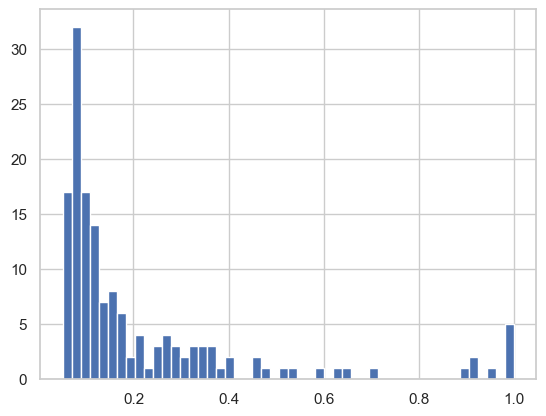

In [85]:
plt.hist(dfeff['EAT'], bins=50)

In [86]:
# cr vs cre, ncr vs ncre
# fdh_rdm vs eat , rdm vs ceat(convexified)